<a href="https://colab.research.google.com/github/ChrisStavropoulos/AI-in-Cybersecurity/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
#συνάρτηση εισαγωγής συνόλου δεδομένων
def load_dataset(url='https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv'):
    df = pd.read_csv(url)
    X = df.drop('target', axis=1).values
    y = df['target'].values
    return X, y
    y = df['target'].values
    return X, y

In [19]:
#φόρτωση δεδομένων
X, y = load_dataset()
df = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv')
print("Data Shape:", df.shape)
print("Columns:", df.columns)
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

Data Shape: (14967, 26)
Columns: Index(['Avg_syn_flag', 'Avg_urg_flag', 'Avg_fin_flag', 'Avg_ack_flag',
       'Avg_psh_flag', 'Avg_rst_flag', 'Avg_DNS_pkt', 'Avg_TCP_pkt',
       'Avg_UDP_pkt', 'Avg_ICMP_pkt', 'Duration_window_flow', 'Avg_delta_time',
       'Min_delta_time', 'Max_delta_time', 'StDev_delta_time',
       'Avg_pkts_lenght', 'Min_pkts_lenght', 'Max_pkts_lenght',
       'StDev_pkts_lenght', 'Avg_small_payload_pkt', 'Avg_payload',
       'Min_payload', 'Max_payload', 'StDev_payload', 'Avg_DNS_over_TCP',
       'target'],
      dtype='object')


In [20]:
#κανονικοποίηση των δεδομένων
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

In [21]:
#διαχωρισμός των δεδομένων
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels_categorical, test_size=0.2, random_state=42, stratify=labels_encoded
)

In [22]:
#δημιουργία του μοντέλου
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(labels_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,843 (15.01 KB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#εκπαίδευση του μοντέλου
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3876 - loss: 1.0943 - val_accuracy: 0.7236 - val_loss: 0.9060
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6077 - loss: 0.8979 - val_accuracy: 0.7720 - val_loss: 0.6654
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6954 - loss: 0.7577 - val_accuracy: 0.8113 - val_loss: 0.5582
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 0.6734 - val_accuracy: 0.8338 - val_loss: 0.5291
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.6683 - val_accuracy: 0.8426 - val_loss: 0.5118
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7730 - loss: 0.6226 - val_accuracy: 0.8484 - val_loss: 0.4692
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7834 - loss: 0.6030 - val_accuracy: 0.8489 - val_loss: 0.4634
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7881 - loss: 0.6070 - val_accuracy: 0.

In [24]:
#αξιολόγηση του μοντέλου
eval_results = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", eval_results[1])

Test Accuracy: 0.8967936038970947


In [25]:
# Πίνακας Σύγχυσης και Αναφορά Ταξινόμησης
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
target_names = [str(cls) for cls in label_encoder.classes_]
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=target_names))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[851  84  66]
 [ 40 921  42]
 [ 49  28 913]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      1001
         1.0       0.89      0.92      0.90      1003
         2.0       0.89      0.92      0.91       990

    accuracy                           0.90      2994
   macro avg       0.90      0.90      0.90      2994
weighted avg       0.90      0.90      0.90      2994



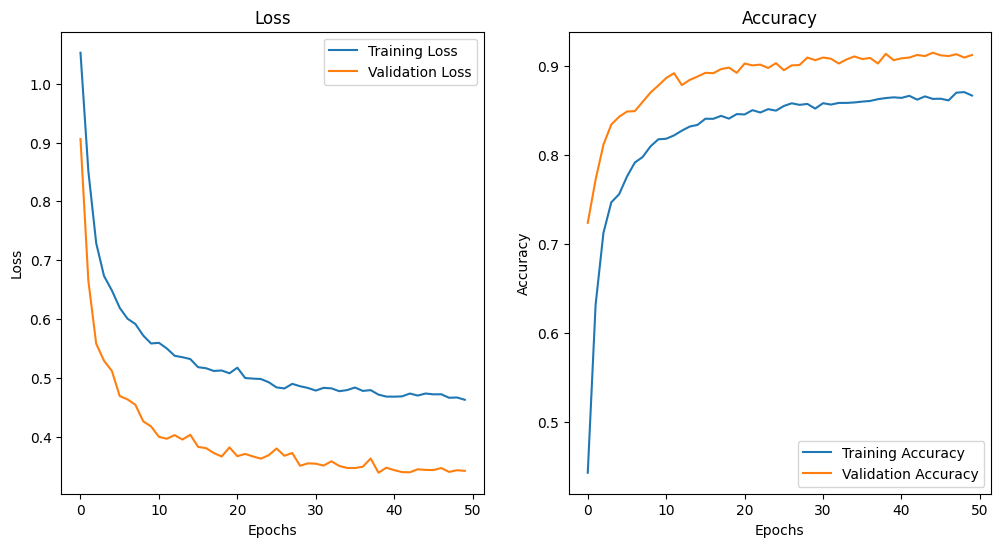

In [26]:
#σχεδίαση της ακρίβειας εκπαίδευσης
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()